In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
#person income number of orders number of offers sum of amount
#day vs amount scatter plot

In [3]:
#creating order data
transaction_data = transcript[transcript['event'] == 'transaction'][['person','value','time']].\
reset_index(drop = True).copy()

In [4]:
transaction_data['amount'] = transaction_data['value'].apply(lambda x: x.get('amount'))

In [5]:
person = transaction_data.groupby('person',as_index = False).agg({'amount' : 'sum',
                                                         'time' : 'count'})\
                                                   .rename(columns = {'time' : 'nnumber_orders'})

In [6]:
person.head()

,person,amount,nnumber_orders
0,0009655768c64bdeb2e877511632db8f,127.60,8
1,00116118485d4dfda04fdbaba9a87b5c,4.09,3
2,0011e0d4e6b944f998e987f904e8c1e5,79.46,5
3,0020c2b971eb4e9188eac86d93036a77,196.86,8
4,0020ccbbb6d84e358d3414a3ff76cffd,154.05,12


In [7]:
#creating offer data
or_data = transcript[transcript['event'] == 'offer received'][['person','value','time']].\
reset_index(drop = True).copy()
ov_data = transcript[transcript['event'] == 'offer viewed'][['person','value','time']].\
reset_index(drop = True).copy()
oc_data = transcript[transcript['event'] == 'offer completed'][['person','value','time']].\
reset_index(drop = True).copy()


In [8]:
person_order_r = or_data.groupby('person',as_index = False).agg({'time' : 'count'})\
                                                   .rename(columns = {'time' : 'number_offers'})
person_order_v = ov_data.groupby('person',as_index = False).agg({'time' : 'count'})\
                                                   .rename(columns = {'time' : 'number_offers_viewed'})
person_order_c = oc_data.groupby('person',as_index = False).agg({'time' : 'count'})\
                                                   .rename(columns = {'time' : 'number_offers_completed'})


In [9]:
person_order_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16994 entries, 0 to 16993
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   person         16994 non-null  object
 1   number_offers  16994 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 398.3+ KB


In [10]:
#joining data
profile.rename(columns = {'id' : 'person'},inplace = True)
profile = profile.dropna().reset_index(drop = True)
person_final = profile.merge(person,on = 'person',how = 'left').\
                       merge(person_order_r,on = 'person',how = 'left').\
                       merge(person_order_c,on = 'person',how = 'left').\
                       merge(person_order_v,on = 'person',how = 'left')


In [11]:
person_final.head()

,gender,age,person,became_member_on,income,amount,nnumber_orders,number_offers,number_offers_completed,number_offers_viewed
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,77.01,3.0,2.0,1.0,NaN
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,159.27,7.0,4.0,3.0,4.0
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,57.73,3.0,4.0,2.0,3.0
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,36.43,3.0,6.0,5.0,6.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,15.62,4.0,3.0,1.0,2.0


In [12]:
person_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 0 to 14824
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   14825 non-null  object 
 1   age                      14825 non-null  int64  
 2   person                   14825 non-null  object 
 3   became_member_on         14825 non-null  int64  
 4   income                   14825 non-null  float64
 5   amount                   14492 non-null  float64
 6   nnumber_orders           14492 non-null  float64
 7   number_offers            14820 non-null  float64
 8   number_offers_completed  11986 non-null  float64
 9   number_offers_viewed     14675 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.2+ MB


In [13]:
person_final.fillna(0,inplace = True)
person_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 0 to 14824
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   14825 non-null  object 
 1   age                      14825 non-null  int64  
 2   person                   14825 non-null  object 
 3   became_member_on         14825 non-null  int64  
 4   income                   14825 non-null  float64
 5   amount                   14825 non-null  float64
 6   nnumber_orders           14825 non-null  float64
 7   number_offers            14825 non-null  float64
 8   number_offers_completed  14825 non-null  float64
 9   number_offers_viewed     14825 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.2+ MB


/Users/dwarkesh.natarajan/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


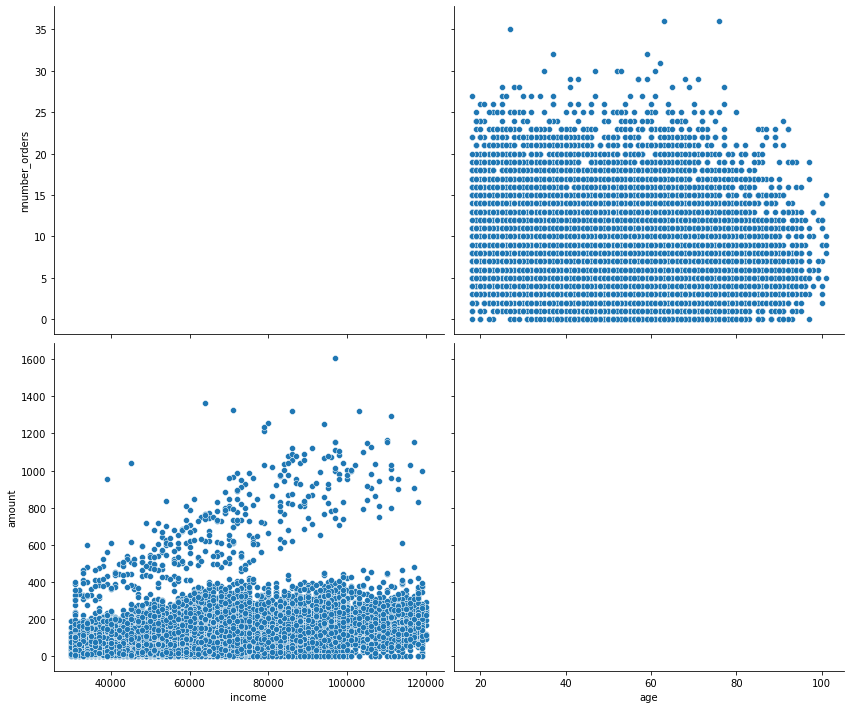

In [14]:
sns.pairplot(data = person_final, y_vars = ['nnumber_orders','amount'],x_vars = ['income','age'],
             size = 5,aspect = 1.2)
#plt.xlabel("Amount spent",fontsize = 14)
#plt.ylabel("Income",fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [15]:
person_final['age'].max()


101

/Users/dwarkesh.natarajan/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


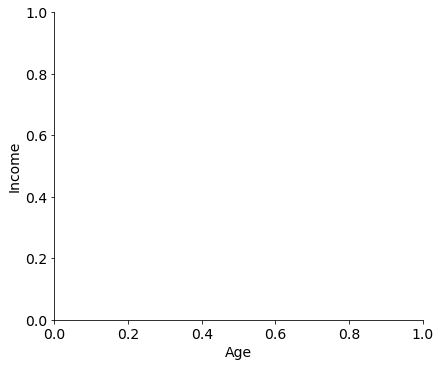

In [16]:
sns.pairplot(data = person_final, y_vars = ['income'],x_vars = ['age'],
             size = 5,aspect = 1.2)
plt.xlabel("Age",fontsize = 14)
plt.ylabel("Income",fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

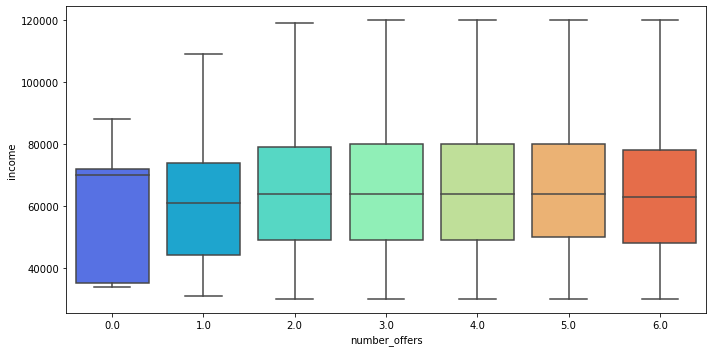

In [17]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers',y='income',palette='rainbow')
plt.tight_layout()

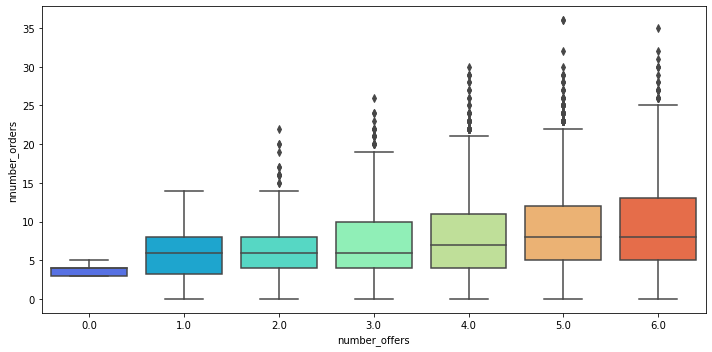

In [18]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers',y='nnumber_orders',palette='rainbow')
plt.tight_layout()

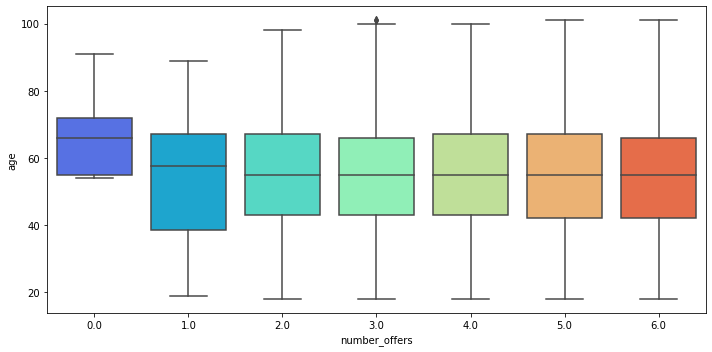

In [19]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers',y='age',palette='rainbow')
plt.tight_layout()

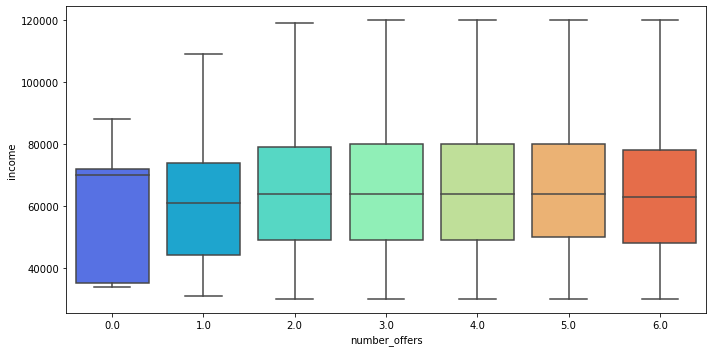

In [20]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers',y='income',palette='rainbow')
plt.tight_layout()

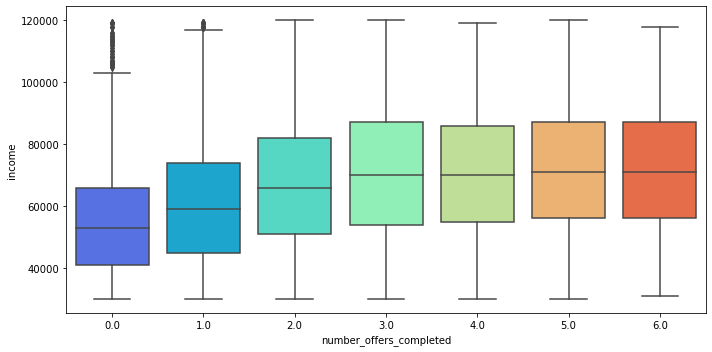

In [21]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers_completed',y='income',palette='rainbow')
plt.tight_layout()

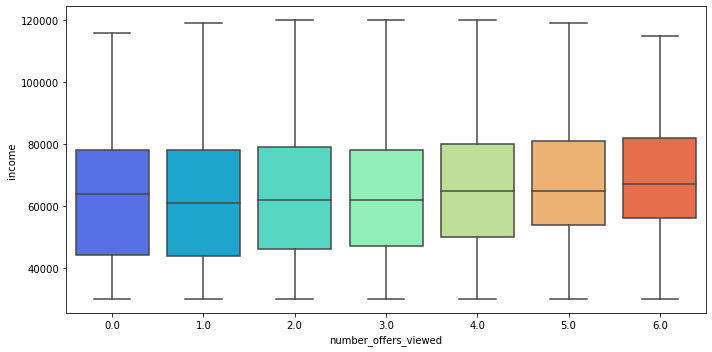

In [22]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers_viewed',y='income',palette='rainbow')
plt.tight_layout()

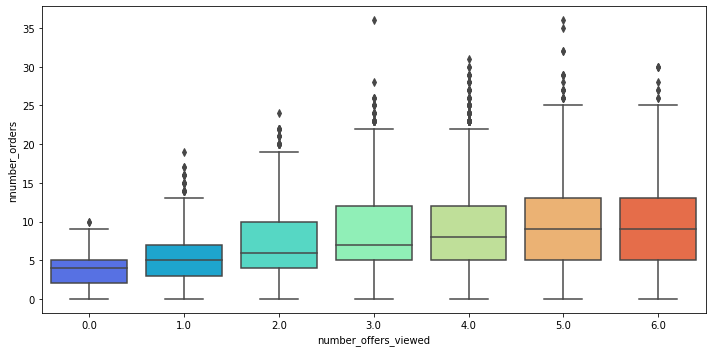

In [23]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers_viewed',y='nnumber_orders',palette='rainbow')
plt.tight_layout()

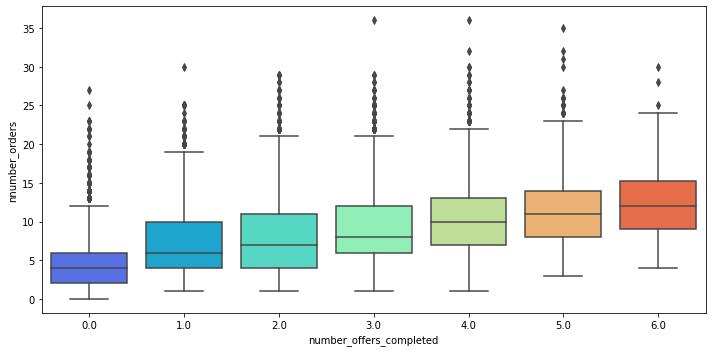

In [24]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers_completed',y='nnumber_orders',palette='rainbow')
plt.tight_layout()

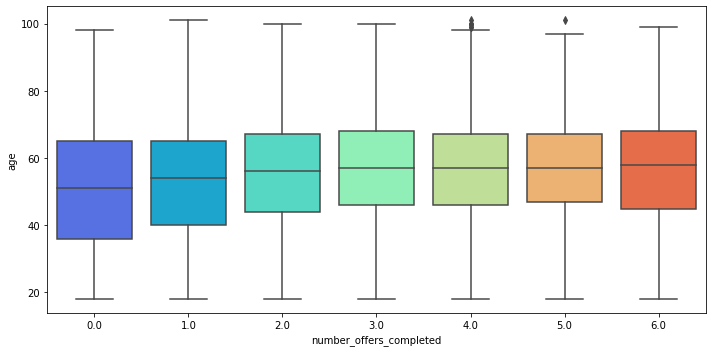

In [25]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data=person_final,x='number_offers_completed',y='age',palette='rainbow')
plt.tight_layout()

/Users/dwarkesh.natarajan/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


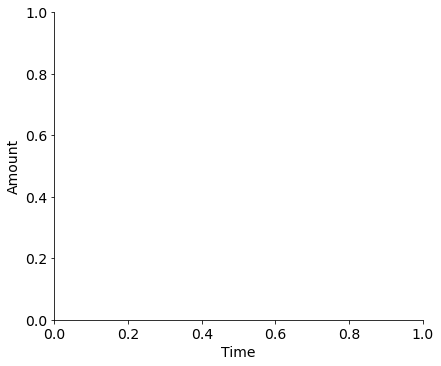

In [26]:
sns.pairplot(data = transaction_data, y_vars = ['amount'],x_vars = ['time'],
             size = 5,aspect = 1.2)
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Amount",fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

<AxesSubplot:xlabel='gender', ylabel='number_offers_completed'>

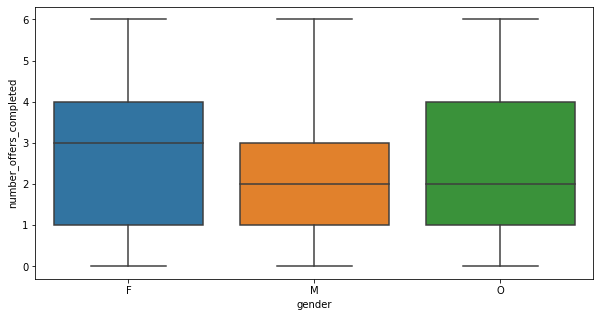

In [27]:
#fig,axes = plt.subplots(2,1,figsize = (12,6))
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data = person_final,x='gender',y='number_offers_completed')

<AxesSubplot:xlabel='gender', ylabel='number_offers_viewed'>

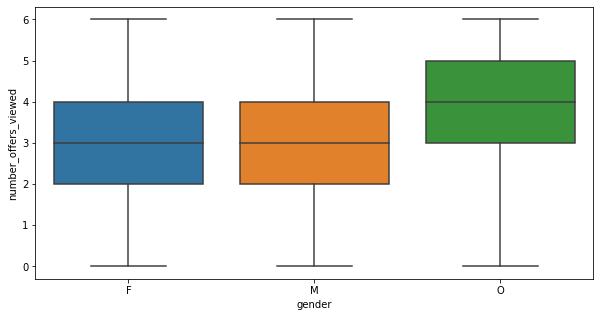

In [28]:
fig,axes=plt.subplots(figsize=(10,5))
sns.boxplot(data = person_final,x='gender',y='number_offers_viewed')